In [281]:
%matplotlib inline 
import numpy as np
import pandas as pd
import nibabel as nib 
import glob

In [342]:
df=pd.read_table('~/GIT/ENIGMA/data/Behaviour_Information_ALL_April7_2022_sorted.csv', header=0, delimiter=',')
sub_left=df['LESIONED_HEMISPHERE']

In [299]:
# load SMATT
smatt_dir= '/Users/emilyolafson/GIT/ENIGMA/data/lesion_load/smatt_all_motor_rois/smatt-template/'
smatt_files = glob.glob(smatt_dir + '*.nii');

smatts = [smatt.replace(smatt_dir, '').replace('-S-MATT.nii', '') for smatt in smatt_files]
smatts.remove('S-MATT.nii')
smatts.sort()


LM1_CST = nib.load(smatt_dir + 'Left-M1-S-MATT.nii').get_fdata()
LPMd_CST = nib.load(smatt_dir + 'Left-PMd-S-MATT.nii').get_fdata()
LPMv_CST = nib.load(smatt_dir + 'Left-PMv-S-MATT.nii').get_fdata()
LS1_CST = nib.load(smatt_dir + 'Left-S1-S-MATT.nii').get_fdata()
LSMA_CST = nib.load(smatt_dir + 'Left-SMA-S-MATT.nii').get_fdata()
LpreSMA_CST = nib.load(smatt_dir + 'Left-preSMA-S-MATT.nii').get_fdata()

RM1_CST = nib.load(smatt_dir + 'Right-M1-S-MATT.nii').get_fdata()
RPMd_CST = nib.load(smatt_dir + 'Right-PMd-S-MATT.nii').get_fdata()
RPMv_CST = nib.load(smatt_dir + 'Right-PMv-S-MATT.nii').get_fdata()
RS1_CST = nib.load(smatt_dir + 'Right-S1-S-MATT.nii').get_fdata()
RSMA_CST = nib.load(smatt_dir + 'Right-SMA-S-MATT.nii').get_fdata()
RpreSMA_CST = nib.load(smatt_dir + 'Right-preSMA-S-MATT.nii').get_fdata()

colnames = ['M1','PMd','PMv','S1','SMA','preSMA']


In [350]:
lesion_folder = '/Users/emilyolafson/GIT/ENIGMA/data/lesionmasks/all_lesionmasks_2009tov6_usingSym_rename/'

# calculate lesion load for each subject and append to growing table
sub_vecs=np.empty(shape=(0, 6))
                  
for sub in range(0,len(df)):
    lesion = nib.load(lesion_folder+  df.loc[df.index[sub],'BIDS_ID']+'.nii.gz').get_fdata();
    if sub_left[sub]==1: #left
        M1_CST_sub=np.sum(lesion*LM1_CST)
        PMd_CST_sub=np.sum(lesion*LPMd_CST)
        PMv_CST_sub=np.sum(lesion*LPMv_CST)
        S1_CST_sub=np.sum(lesion*LS1_CST)
        SMA_CST_sub=np.sum(lesion*LSMA_CST)
        preSMA_CST_sub=np.sum(lesion*LpreSMA_CST)

    if sub_left[sub]==2: #right
        M1_CST_sub=np.sum(lesion*RM1_CST)
        PMd_CST_sub=np.sum(lesion*RPMd_CST)
        PMv_CST_sub=np.sum(lesion*RPMv_CST)
        S1_CST_sub=np.sum(lesion*RS1_CST)
        SMA_CST_sub=np.sum(lesion*RSMA_CST)
        preSMA_CST_sub=np.sum(lesion*RpreSMA_CST)
        
    if sub_left[sub]==3 or sub_left[sub]==4 or  sub_left[sub]==5 or  sub_left[sub]==6:
        # 3 = bilateral
        # 4 = brainstem
        # 5 = cerebellum
        # 6 = combination of cerebral hemisphere + brainstem/cerebellum
        M1_CST_sub=np.mean((np.sum(lesion*RM1_CST),np.sum(lesion*LM1_CST)))
        PMd_CST_sub=np.mean((np.sum(lesion*RPMd_CST),np.sum(lesion*LPMd_CST)))
        PMv_CST_sub=np.mean((np.sum(lesion*RPMv_CST),np.sum(lesion*LPMv_CST)))
        S1_CST_sub=np.mean((np.sum(lesion*RS1_CST),np.sum(lesion*LS1_CST)))
        SMA_CST_sub=np.mean((np.sum(lesion*RSMA_CST),np.sum(lesion*LSMA_CST)))
        preSMA_CST_sub=np.mean((np.sum(lesion*RpreSMA_CST),np.sum(lesion*LpreSMA_CST)))

    subvec=[M1_CST_sub, PMd_CST_sub, PMv_CST_sub, S1_CST_sub, SMA_CST_sub, preSMA_CST_sub]
    sub_vecs=np.append(sub_vecs, np.reshape(subvec, [1, 6]), axis=0)

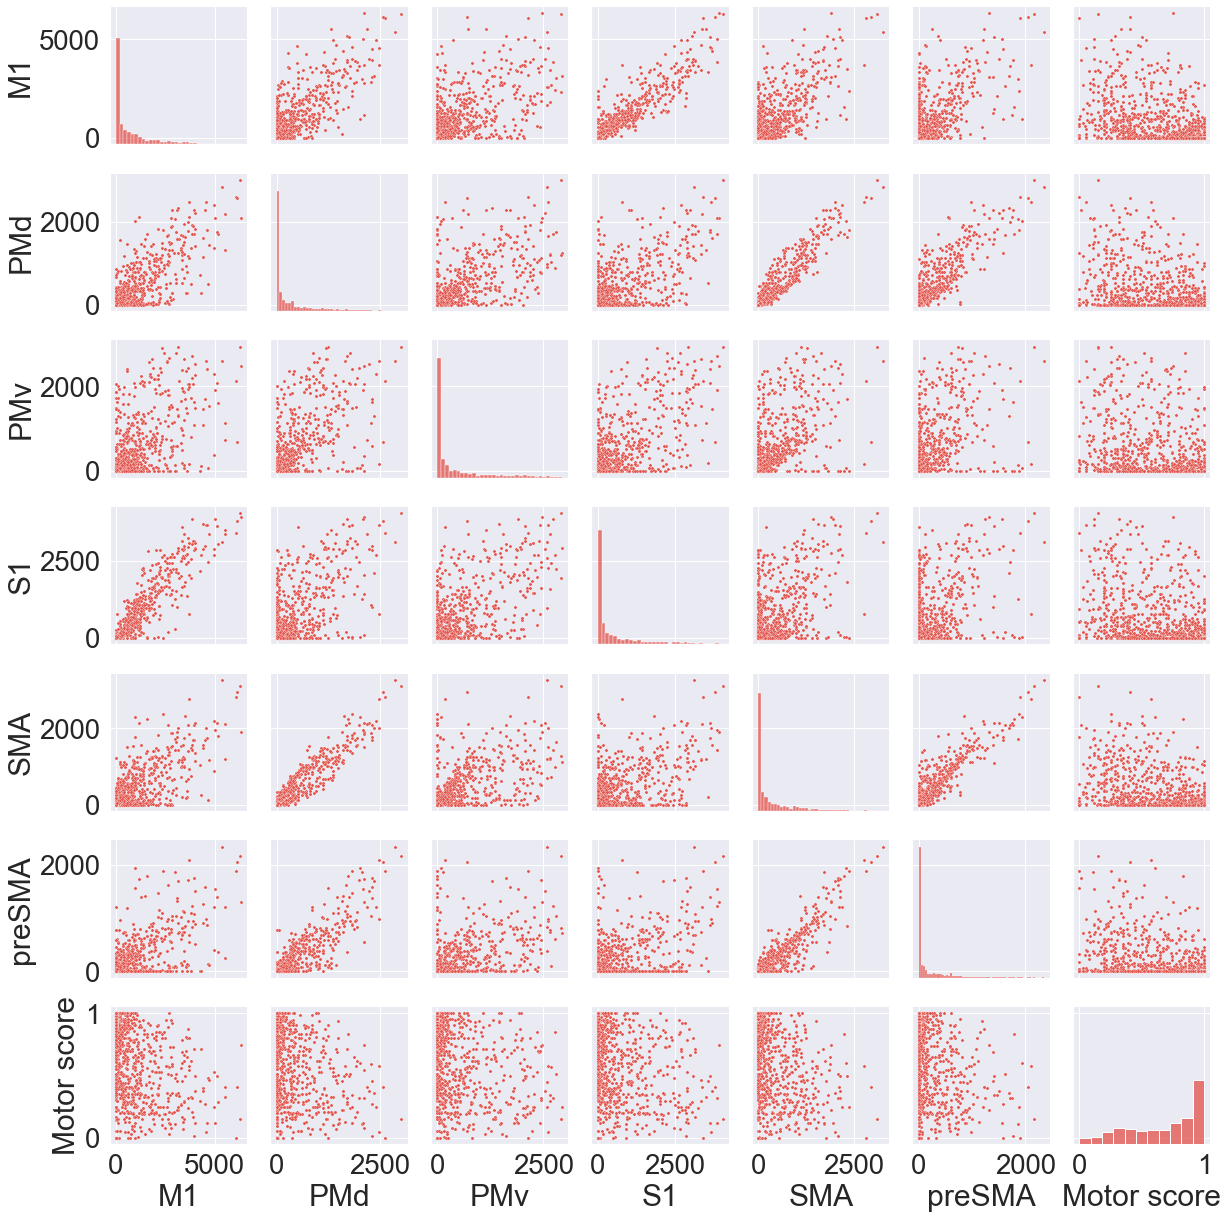

In [395]:
import seaborn as sns

smatt_ll = pd.DataFrame(columns=colnames, data = sub_vecs)
smatt_ll['Motor score']=np.transpose(df['NORMED_MOTOR'].values)

sns.set(font_scale=2.5)
sns.set_palette('Spectral')
sns.pairplot(smatt_ll,plot_kws={"s": 10})
plt.savefig('/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/figures/SMATT_scatterplts.png')

In [396]:
smatt_ll

,M1,PMd,PMv,S1,SMA,preSMA,Motor score
0,18.0,435.0,2048.0,59.0,144.0,190.0,0.636364
1,8.0,62.0,184.0,0.0,74.0,35.0,0.742424
2,37.0,168.0,86.0,1.0,259.0,279.0,0.742424
3,2648.0,1696.0,0.0,200.0,2092.0,1628.0,0.515152
4,1958.0,683.0,630.0,1339.0,704.0,610.0,0.666667
...,...,...,...,...,...,...,...
1063,306.0,51.0,145.0,108.0,155.0,0.0,0.893939
1064,386.0,317.0,192.0,315.0,345.0,266.0,0.878788
1065,1786.0,603.0,2224.0,1840.0,578.0,378.0,0.060606
1066,0.0,0.0,0.0,67.0,0.0,0.0,0.909091
